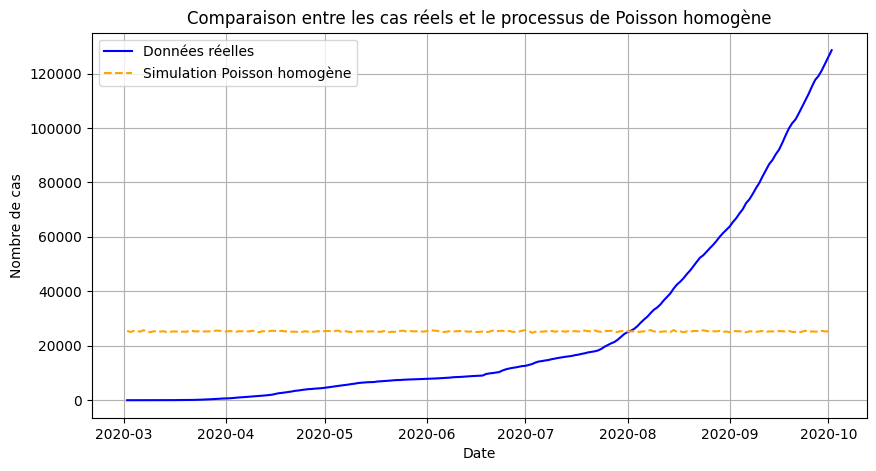

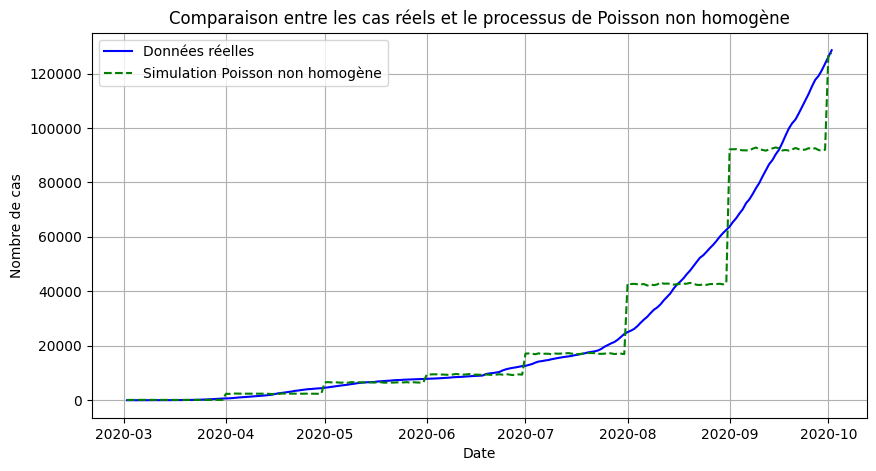

Résultats du test de Kolmogorov-Smirnov pour le processus homogène :
Statistique KS : 0.6321205588285577
P-value : 2.1530364049946536e-83
Conclusion : Processus de Poisson rejeté

Résultats du test de Kolmogorov-Smirnov pour le processus non homogène :
Statistique KS : 0.6321205588285577
P-value : 2.1530364049946536e-83
Conclusion : Processus de Poisson rejeté


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, kstest

# Charger le fichier CSV
file_path = 'covid19-morocco-regions.csv'
data = pd.read_csv(file_path)

# Conversion de la date en format datetime pour l'analyse temporelle
data['Date'] = pd.to_datetime(data['Date'])

# Regrouper par date pour obtenir le total journalier de cas confirmés
daily_cases = data.groupby('Date')['Confirmed'].sum()

# Calcul du taux λ pour le processus de Poisson homogène
lambda_homogene = daily_cases.mean()

# Simulation du processus de Poisson homogène
simulation_homogene = np.random.poisson(lambda_homogene, len(daily_cases))

# Visualisation de la simulation homogène vs données réelles
plt.figure(figsize=(10, 5))
plt.plot(daily_cases.index, daily_cases, label='Données réelles', color='blue')
plt.plot(daily_cases.index, simulation_homogene, label='Simulation Poisson homogène', linestyle='--', color='orange')
plt.title("Comparaison entre les cas réels et le processus de Poisson homogène")
plt.xlabel("Date")
plt.ylabel("Nombre de cas")
plt.legend()
plt.grid(True)
plt.show()

# Estimation de λ(t) pour le processus de Poisson non homogène
lambda_non_homogene = daily_cases.resample('ME').mean().ffill()

# Simulation du processus de Poisson non homogène
simulation_non_homogene = []
for i in range(len(daily_cases)):
    month = daily_cases.index[i].month
    lambda_t = lambda_non_homogene[daily_cases.index[i].strftime('%Y-%m')]
    simulation_non_homogene.append(np.random.poisson(lambda_t))

# Convertir la liste en un tableau NumPy
simulation_non_homogene = np.array(simulation_non_homogene)

# Visualisation de la simulation non homogène vs données réelles
plt.figure(figsize=(10, 5))
plt.plot(daily_cases.index, daily_cases, label='Données réelles', color='blue')
plt.plot(daily_cases.index, simulation_non_homogene, label='Simulation Poisson non homogène', linestyle='--', color='green')
plt.title("Comparaison entre les cas réels et le processus de Poisson non homogène")
plt.xlabel("Date")
plt.ylabel("Nombre de cas")
plt.legend()
plt.grid(True)
plt.show()

# Validation par test de Kolmogorov-Smirnov
# Calculer les temps d'inter-arrivées pour les simulations homogènes
inter_arrival_times_homogene = np.diff(np.where(simulation_homogene > 0)[0])
n_homogene = len(inter_arrival_times_homogene)
lambda_estimate_homogene = 1 / np.mean(inter_arrival_times_homogene)
D_homogene, p_value_homogene = kstest(inter_arrival_times_homogene, 'expon', args=(0, 1/lambda_estimate_homogene))

# Afficher les résultats du test pour le processus homogène
print("Résultats du test de Kolmogorov-Smirnov pour le processus homogène :")
print(f"Statistique KS : {D_homogene}")
print(f"P-value : {p_value_homogene}")
print(f"Conclusion : {'Processus de Poisson accepté' if D_homogene <= np.sqrt(-np.log(0.05/2)/(2*n_homogene)) else 'Processus de Poisson rejeté'}")

# Calculer les temps d'inter-arrivées pour les simulations non homogènes
inter_arrival_times_non_homogene = np.diff(np.where(simulation_non_homogene > 0)[0])
n_non_homogene = len(inter_arrival_times_non_homogene)
lambda_estimate_non_homogene = 1 / np.mean(inter_arrival_times_non_homogene)
D_non_homogene, p_value_non_homogene = kstest(inter_arrival_times_non_homogene, 'expon', args=(0, 1/lambda_estimate_non_homogene))

# Afficher les résultats du test pour le processus non homogène
print("\nRésultats du test de Kolmogorov-Smirnov pour le processus non homogène :")
print(f"Statistique KS : {D_non_homogene}")
print(f"P-value : {p_value_non_homogene}")
print(f"Conclusion : {'Processus de Poisson accepté' if D_non_homogene <= np.sqrt(-np.log(0.05/2)/(2*n_non_homogene)) else 'Processus de Poisson rejeté'}")
